# Using Matplotlib for Data Visualization

```{image} ../_static/images/matplotliblogo.svg
:class: border mb-3
:alt: matplotliblogo
:scale: 40%
:align: right
```
Matplotlib is a powerful data visualization library for Python that
provides a rich set of features for creating a wide variety of plots and charts.

Many other Python plotting libraries are built on top of Matplotlib including
_Seaborn_, _Plotly_, _Bokeh_, _Holoviews_.
Some key features of Matplotlib include:

1. **Wide range of plot types**: Matplotlib supports a wide range of plot types, including
   line plots, scatter plots, bar charts, histograms, pie charts, 3D plots, and more.
2. **Customization**: Matplotlib allows extensive customization of plot properties,
   including color, line style, markers, labels, and fonts.
3. **Interactive visualization**: Matplotlib can be used to create interactive plots with
   features such as zooming, panning, and hovering over data points.
4. **Integration with other libraries**: Matplotlib supports a variety of data types including
   `list`, `numpy.ndarray`, `pandas.Series` and `pandas.DataFrame`.
5. **Publication quality plots**: Matplotlib produces high-quality plots suitable for use in
   scientific publications, with support for vector graphics formats such as PDF and SVG.

## 1. First Plot

Just as `import numpy as np` and `import pandas as pd`, there is a convention for importing
Matplotlib as well. Uniquely, we normally **_do not_** "import" the whole `matplotlib` package
but one of its module, `pyplot` like the following.

Oftentimes, you need to use `numpy` and `pandas` together with Matplotlib. So it is a good idea
to also import those two libraries. And when you do, you should follow this order.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

```{tip}
Use magic command `%matplotlib inline` to render plots directly inside Python Notebook.
```

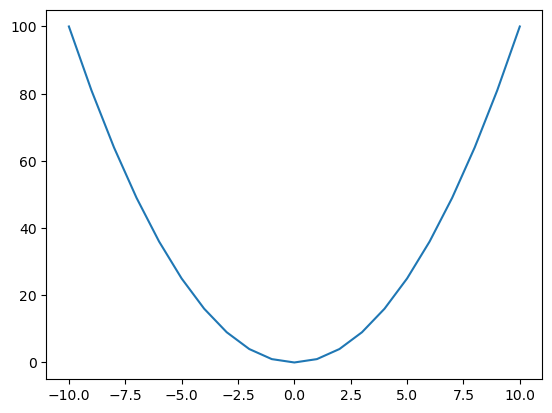

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(-10, 11)
y = x**2

plt.plot(x, y)
plt.show()

## 2. Figure and axes

In Matplotlib, a **figure** is a top-level container for all plot elements.
It can contain one or more axes (also known as subplots), each of which
is a **_container_** for a specific plot or graph.
A figure can have multiple subplots, arranged in a **grid-like structure**.
Subplots can be created using the `subplots()` function, which
take arguments to specify the number of rows and columns of subplots.

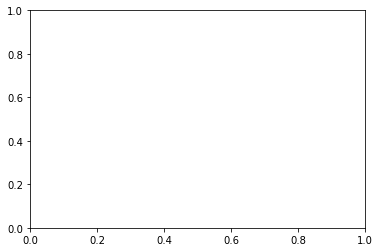

In [5]:
fig, axis = plt.subplots()

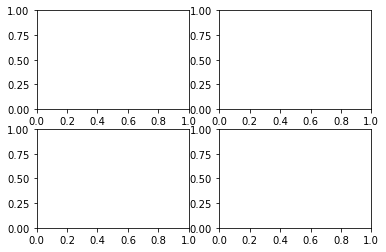

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2)

Now, let's look at a concrete example in our class geodatabase.

In [2]:
import arcpy

gdb_worksp = r"..\data\class_data.gdb"
arcpy.env.workspace = gdb_worksp
blkgrp_fc = "blockgroups"

Recall how we convert feature class to `numpy.ndarray` and to `pandas.DataFrame`.
Let's define a function for this conversion.

In [3]:
def fc_to_df(fc, fields=None):
    if fields is None:
        fields = [field.name for field in arcpy.ListFields(fc)]
        fields = fields[2:]  # ignore OID and SHAPE fields
    arr = arcpy.da.FeatureClassToNumPyArray(fc, fields)
    return pd.DataFrame(arr, columns=fields)

In [4]:
blkgrp_df = fc_to_df(blkgrp_fc)
blkgrp_df.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,...,DEN_NOTATA,PCT_OWN5,PCT_RENT5,PCT_BACHLR,PCT_POV,PCT_RU1,DATAYEAR,DESCRIPT,Shape_Length,Shape_Area
0,12,023,110903,2,120231109032,Block Group 2,G5030,S,57546992.0,57286.0,...,0.000000,17.225951,62.878788,9.922481,23.488372,23.488372,"REDISTRICTING, SF1, ACS 2010",120231109032,33859.041797,5.760426e+07
1,12,023,110904,1,120231109041,Block Group 1,G5030,S,85591551.0,490327.0,...,0.000329,26.212320,58.015267,5.456656,4.102167,4.102167,"REDISTRICTING, SF1, ACS 2010",120231109041,57228.368002,8.608197e+07
2,12,007,000300,5,120070003005,Block Group 5,G5030,S,196424609.0,217862.0,...,0.000000,13.270142,68.181818,1.254613,10.701107,10.701107,"REDISTRICTING, SF1, ACS 2010",120070003005,75108.291194,1.966427e+08
3,12,007,000300,4,120070003004,Block Group 4,G5030,S,16339411.0,725167.0,...,0.000000,18.924731,73.711340,12.617839,14.902103,14.902103,"REDISTRICTING, SF1, ACS 2010",120070003004,25941.067880,1.706462e+07
4,12,007,000300,1,120070003001,Block Group 1,G5030,S,57089369.0,3362134.0,...,0.001138,22.957198,43.333333,1.134021,21.161826,21.161826,"REDISTRICTING, SF1, ACS 2010",120070003001,37132.065396,6.045165e+07


In [ ]:
blkgrp_df_short = fc_to_df(blkgrp_fc, ["GEOID10", "ALAND10", "TOTALPOP", "AVE_HH_SZ"])
blkgrp_df_short.head()

## 3. Scatter plot and basic plot settings

The following statement returns all column names in a `DataFrame` as
a `numpy.ndarray`.

In [7]:
blkgrp_df.columns.values

array(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10', 'GEOID10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'SUMLEV', 'STATE', 'COUNTY', 'TRACT',
       'BLKGRP', 'ACRES', 'TOTALPOP', 'WHITE', 'BLACK', 'AMERI_ES',
       'HAWN_PI', 'ASIAN', 'OTHER', 'MULT_RACE', 'HISPANIC', 'NOT_HISP',
       'POP18', 'HSE_UNITS', 'OCCUPIED', 'VACANT', 'PCT_WHITE',
       'PCT_BLACK', 'PCT_AMERI', 'PCT_ASIAN', 'PCT_HAWN', 'PCT_OTHER',
       'PCT_MULTI', 'PCT_HISP', 'PCT_OVER18', 'PCT_OCC', 'PCT_VACANT',
       'DEN_POP', 'DEN_WHITE', 'DEN_BLACK', 'DEN_AMERI', 'DEN_HAWN',
       'DEN_ASIAN', 'DEN_OTHER', 'DEN_MULTI', 'DEN_HISP', 'DEN_OVER18',
       'HS_PER_AC', 'POPUNDER18', 'PCTUNDER18', 'DENUNDER18', 'WHITE_NH',
       'MINORITY', 'PCT_MNRTY', 'DEN_MNRTY', 'AGE_UNDER5', 'AGE_5_17',
       'AGE_18_21', 'AGE_22_29', 'AGE_30_39', 'AGE_40_49', 'AGE_50_64',
       'AGE_65_UP', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE',
       'PCT

### 3.1 A simple scatter plot

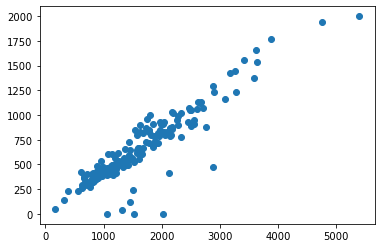

In [8]:
fig, axis = plt.subplots()
axis.scatter(blkgrp_df["TOTALPOP"], blkgrp_df["HOUSEHOLDS"])

### 3.2 Figure size

We can customize the figure size by changing `figsize` and assign a **tuple**
of `(<width>, <height>)`

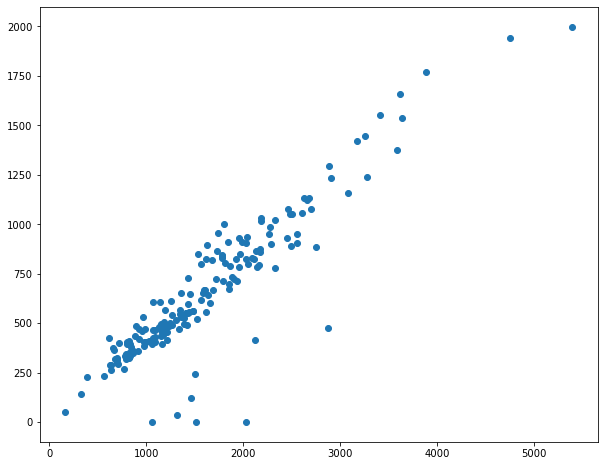

In [9]:
fig, axis = plt.subplots(figsize=(8, 4))
axis.scatter(blkgrp_df["TOTALPOP"], blkgrp_df["HOUSEHOLDS"])

### 3.3 Title and label

We can change the table of x and y axes and the title of the figure by using
following functions:

- `set_xlabel()`
- `set_ylabel()`
- `set_title()`

Text(0.5, 1.0, '2010 Alachua County Census Block Group')

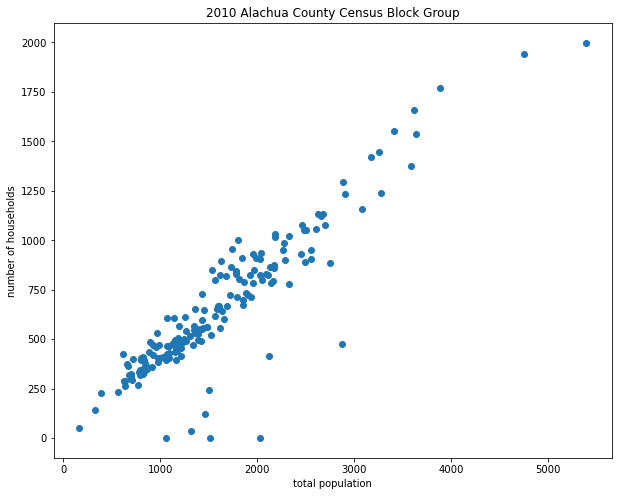

In [10]:
fig, axis = plt.subplots(figsize=(8, 4))
axis.scatter(blkgrp_df["TOTALPOP"], blkgrp_df["HOUSEHOLDS"])
axis.set_xlabel("Total population")
axis.set_ylabel("Number of households")
axis.set_title("2010 Alachua County Census Block Group")

### 3.4 Color and marker

In Matplotlib to change color, you can pick any **_color names_**
below and supply the value as a `str` to the `color` argument, or the equivalent `c`.

![base color](https://matplotlib.org/stable/_images/sphx_glr_named_colors_001.png)
![tableau color](https://matplotlib.org/stable/_images/sphx_glr_named_colors_002.png)
![css color](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png)

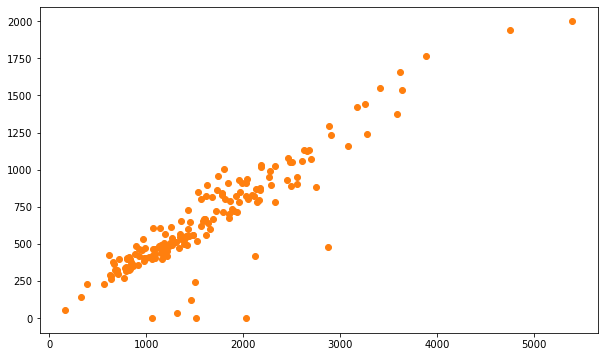

In [11]:
fig, axis = plt.subplots(figsize=(8, 5))
axis.scatter(blkgrp_df["TOTALPOP"],
             blkgrp_df["HOUSEHOLDS"],
             color="tab:orange")

You can change a marker's "_shape_" by setting the `marker` argument or `m`.

[Matplotlib markers](https://matplotlib.org/stable/api/markers_api.html)

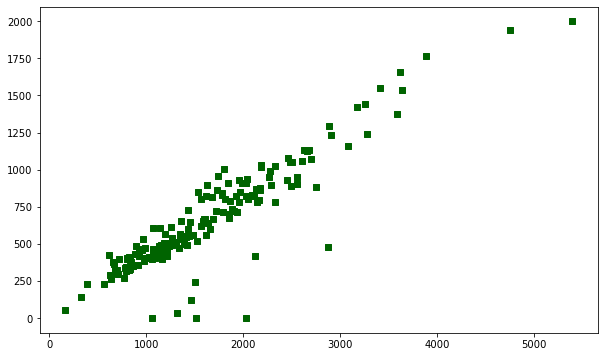

In [12]:
fig, axis = plt.subplots(figsize=(8, 5))
axis.scatter(blkgrp_df["TOTALPOP"],
             blkgrp_df["HOUSEHOLDS"],
             color="darkgreen",
             marker='s')

### 3.5 Marker size

You can set marker's size by the argument `s`.

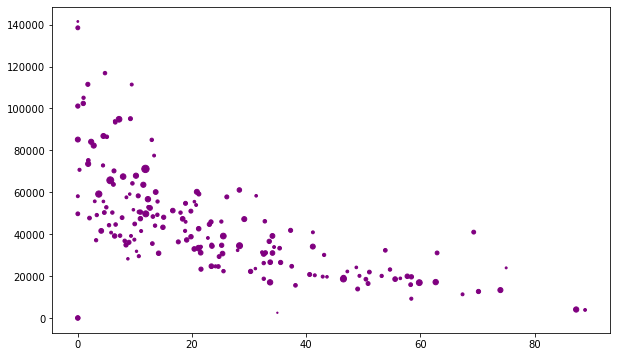

In [13]:
fig, axis = plt.subplots(figsize=(8, 5))
axis.scatter(blkgrp_df["PCT_POV"],
             blkgrp_df["MEDHHINC"],
             color="purple",
             s=blkgrp_df['TOTALPOP']/100)
axis.set_xlabel("Population in poverty (pct)")
axis.set_ylabel("Median household income")

## 4. Bar plot

Bar plot displays rectangular bars with lengths proportional to the values
that they represent. Bar plots are often used to compare the sizes or
**frequencies** of different categories of data.

- use `bar()` to plot 
- the `width` argument

<BarContainer object of 10 artists>

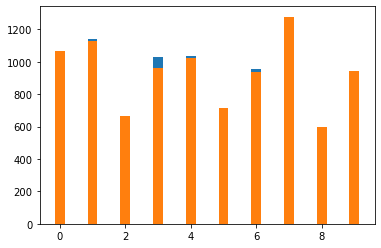

In [14]:
fig, axis = plt.subplots()   # tuple unpacking
axis.bar(np.arange(10),
         blkgrp_df["FEMALE"][:10],
         width=0.3,
         color="tab:blue")
axis.bar(np.arange(10),
         blkgrp_df["MALE"][:10],
         width=0.3,
         color="tab:orange")

<BarContainer object of 10 artists>

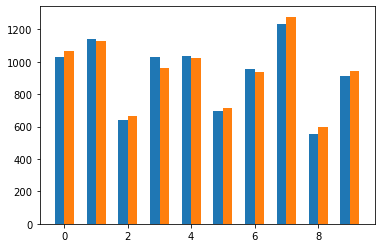

In [15]:
fig, axis = plt.subplots()   # tuple unpacking
axis.bar(np.arange(10) - 0.15,
         blkgrp_df["FEMALE"][:10],
         width=0.3,
         color="tab:blue")
axis.bar(np.arange(10) + 0.15,
         blkgrp_df["MALE"][:10],
         width=0.3,
         color="tab:orange")

### 4.1 Legend

The legend is used to help identify which plot element corresponds
to which data series, especially when multiple data series are
displayed on the same plot.

- set the `label` argument
- use the `legend()` function

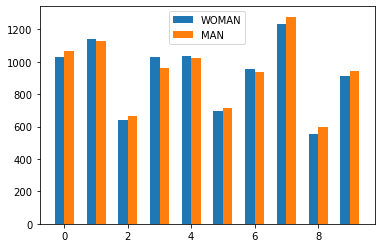

In [16]:
fig, axis = plt.subplots()   # tuple unpacking
axis.bar(np.arange(10) - 0.15,
         blkgrp_df["FEMALE"][:10],
         width=0.3,
         color="tab:blue",
         label="WOMAN")
axis.bar(np.arange(10) + 0.15,
         blkgrp_df["MALE"][:10],
         width=0.3,
         color="tab:orange",
         label="MAN")
axis.legend()

Here are the integer values that correspond to each location:

- `0`: 'best'
- `1`: 'upper right'
- `2`: 'upper left'
- `3`: 'lower left'
- `4`: 'lower right'
- `5`: 'right'
- `6`: 'center left'
- `7`: 'center right'
- `8`: 'lower center'
- `9`: 'upper center'
- `10`: 'center'

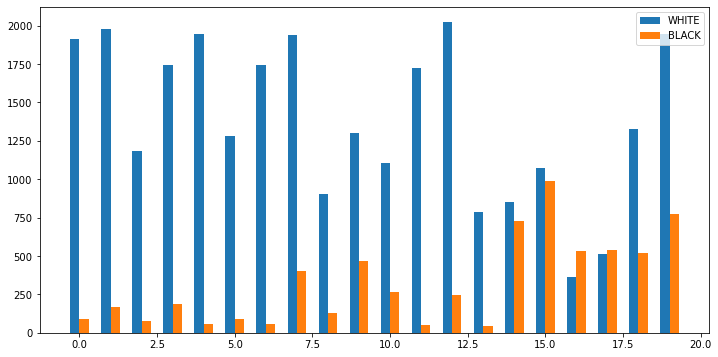

In [17]:
fig, axis = plt.subplots(figsize=(10, 5))
axis.bar(np.arange(20) - 0.15,
         blkgrp_df["WHITE"][:20],
         width=0.3,
         color="tab:blue",
         label="WHITE")
axis.bar(np.arange(20) + 0.15,
         blkgrp_df["BLACK"][:20],
         width=0.3,
         color="tab:orange",
         label="BLACK")
axis.legend(loc=1)  # or axis.legend(loc='upper right')

## 5. Histogram

A histogram is a _graphical representation_ of the **distribution** of a dataset.
It shows the _frequency_ of data points that fall within _equal intervals_ or **bins**.

To create a histogram, use the `hist()` function.

(array([11., 55., 45., 35., 18.,  7.,  4.,  1.,  1.,  1.]),
 array([ 163. ,  686.5, 1210. , 1733.5, 2257. , 2780.5, 3304. , 3827.5,
        4351. , 4874.5, 5398. ]),
 <BarContainer object of 10 artists>)

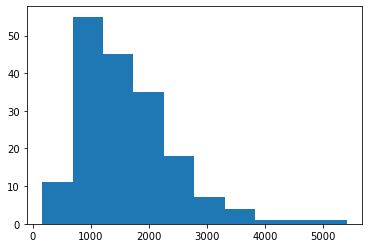

In [18]:
fig, axis = plt.subplots()
axis.hist(blkgrp_df["TOTALPOP"])

By default, **bins** is set to `10`, which means that the data will be divided
into 10 **equal-width** bins. In a histogram, the bin size determines the width
of each bin, which in turn determines the range of values that are **grouped together
and counted**. A smaller bin size will result in more bins and more detail in the
distribution of the data, while a larger bin size will result in fewer bins and less detail.

The choice of bin size is important in constructing a meaningful histogram, as it can
affect the _visual representation_ of the data and the _interpretation_ of the distribution.
A bin size that is too small may result in an **overly detailed** and noisy histogram, while
a bin size that is too large may **obscure important features** of the distribution.

(array([ 3., 26., 37., 32., 27., 21., 12.,  9.,  4.,  4.,  1.,  0.,  0.,
         1.,  1.]),
 array([ 163.,  512.,  861., 1210., 1559., 1908., 2257., 2606., 2955.,
        3304., 3653., 4002., 4351., 4700., 5049., 5398.]),
 <BarContainer object of 15 artists>)

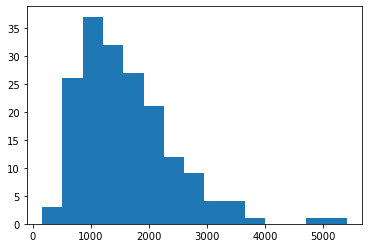

In [19]:
fig, axis = plt.subplots()
axis.hist(blkgrp_df["TOTALPOP"],
          bins=15,
          color="purple")

(array([ 3., 26., 37., 32., 27., 21., 12.,  9.,  4.,  4.,  1.,  0.,  0.,
         1.,  1.]),
 array([ 163.,  512.,  861., 1210., 1559., 1908., 2257., 2606., 2955.,
        3304., 3653., 4002., 4351., 4700., 5049., 5398.]),
 <BarContainer object of 15 artists>)

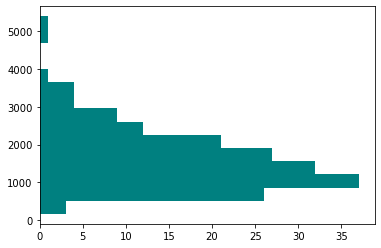

In [21]:
fig, axis = plt.subplots()
axis.hist(blkgrp_df["TOTALPOP"],
          bins=15,
          color="teal",
          orientation="horizontal")

(array([ 3., 26., 37., 32., 27., 21., 12.,  9.,  4.,  4.,  1.,  0.,  0.,
         1.,  1.]),
 array([ 163.,  512.,  861., 1210., 1559., 1908., 2257., 2606., 2955.,
        3304., 3653., 4002., 4351., 4700., 5049., 5398.]),
 [<matplotlib.patches.Polygon at 0x1bba878a348>])

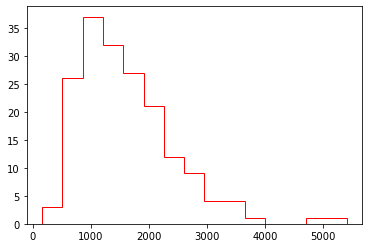

In [22]:
fig, axis = plt.subplots()
axis.hist(blkgrp_df["TOTALPOP"],
          bins=15,
          color="red",
          histtype="step")

### 5.1 Display two plots side by side

Each axis is an element of the axes list.

(array([26., 44., 57., 24., 13.,  7.,  5.,  1.,  0.,  1.]),
 array([  27. ,  264.4,  501.8,  739.2,  976.6, 1214. , 1451.4, 1688.8,
        1926.2, 2163.6, 2401. ]),
 <BarContainer object of 10 artists>)

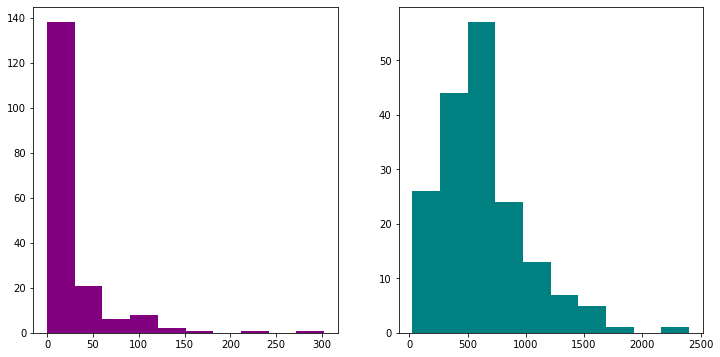

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(blkgrp_df["TRAN_BIKE"], color="purple")
axes[1].hist(blkgrp_df["TRAN_CAR"], color="teal")

```{tip}
Use `plt.tight_layout()` to have a more compact figure.
```

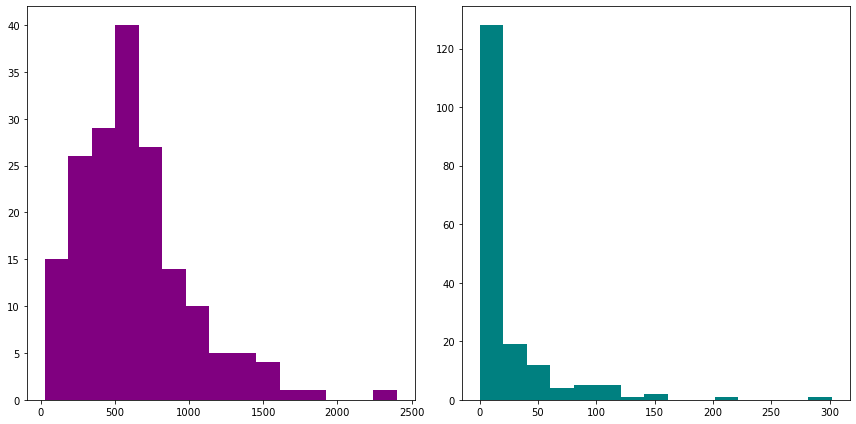

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(blkgrp_df["TRAN_CAR"], bins=15, color="purple")
axes[1].hist(blkgrp_df["TRAN_BIKE"], bins=15, color="teal")
plt.tight_layout()